In [1]:
from deepface import DeepFace
import cv2
import matplotlib.pyplot as plt
import numpy as np
import psycopg2
import pickle
import random
import string
import base64
import os

/Users/lakshyadujari/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
PROJ_DIR = '/Users/lakshyadujari/Desktop/Projects/NIC_AI/Facial Features/Facial-Features-Detection'

In [3]:
models = [
  "VGG-Face", 
  "Facenet", 
  "Facenet512", 
  "OpenFace", 
  "DeepFace", 
  "DeepID", 
  "ArcFace", 
  "Dlib", 
  "SFace",
]
backends = ['opencv', 'ssd', 'dlib', 'retinaface','yolov8','mediapipe']

In [10]:
img_paths = []
for image in os.listdir(PROJ_DIR + '/Images'):
    img_paths.append(os.path.join(PROJ_DIR + '/Images', image))

In [11]:
images = [cv2.imread(image) for image in img_paths]

In [12]:
lakshya = {
    0:[0,1],
    1:[0,4],
    2:[0,7],
    3:[0,8],
    4:[1,4],
    5:[1,7],
    6:[1,8],
    7:[4,7],
    8:[4,8],
    9:[7,8],
}

ishan = {
    0:[6,9]
}

devesh = {
    0:[2,3]
}


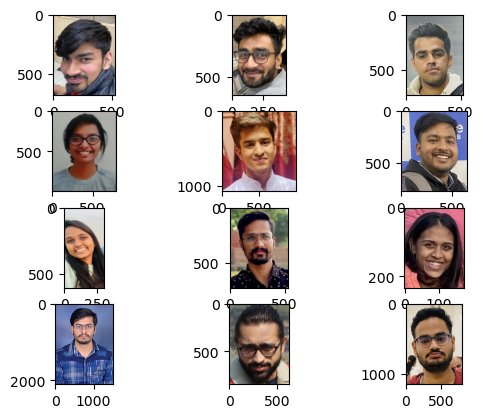

In [13]:
for i in range(12):
    plt.subplot(4, 3, i+1)
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
plt.show()

In [14]:
def draw_bbox(image, x, y, w, h):
    # Define the coordinates
# Draw the bounding box on img1
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Display the image with the bounding box
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()

In [15]:
def matched_bbox(image1,image2, x1, y1, w1, h1,x2, y2, w2, h2,probability):
    # Define the coordinates
# Draw the bounding box on img1
    cv2.rectangle(image1, (x1, y1), (x1 + w1, y1 + h1), (0, 255, 0), 2)
    cv2.rectangle(image2, (x2, y2), (x2 + w2, y2 + h2), (0, 255, 0), 2)

# Display the image with the bounding box
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
    plt.title("Matched with " + str(probability) + " %")
    plt.show()

In [16]:
features = DeepFace.extract_faces(images[9], detector_backend = backends[0],enforce_detection=False)


In [17]:
print(features)

[{'face': array([[[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.43137255, 0.5176471 , 0.7372549 ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.4392157 , 0.5176471 , 0.7411765 ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.43137255, 0.50980395, 0.73333335],
        ...,
        [0.39607844, 0.47843137, 0.654902  ],
        [0.3764706 , 0.45490196, 0.6392157 ],
        [0.43137255, 0.50980395, 0.6862745 ]],

       ...,

       [[0.35686275, 0.38039216, 0.5058824 ],
        [0.45882353, 0.4745098 , 0.63529414],
        [0.4

In [18]:
images = [cv2.imread(image) for image in img_paths]

{'x': 400, 'y': 344, 'w': 700, 'h': 700}


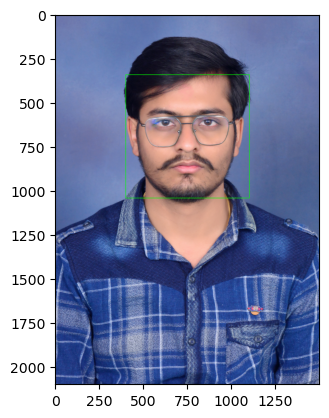

In [19]:
print(features[0]['facial_area'])
draw_bbox(images[9], features[0]['facial_area']['x'], features[0]['facial_area']['y'], features[0]['facial_area']['w'], features[0]['facial_area']['h'])


In [20]:
images = [cv2.imread(image) for image in img_paths]

In [21]:
# for back_count in range(len(backends)):
#     for model_count in range(len(models)):
#         count = 0
#         try:
#             for i in range(len(images)):
#                 for j in range(i+1, len(images)):
#                         result = DeepFace.verify(images[i], images[j], detector_backend=backends[back_count], model_name=models[model_count], enforce_detection=False)
#                         if result['verified'] and result['distance'] < 0.6:
#                             count += 1
#             print("Total Matches Found:", count, "for backend", backends[back_count], "and model", models[model_count])
#         except Exception as e:
#             print(e)
#             model_count += 1
#             print("Error in backend", backends[back_count], "and model", models[model_count])
                    


In [22]:
# optimal on 21/02/2021 is model[0] and backend[2] with 0.6 threshold

In [17]:
for i in range(len(images)):
    for j in range(i+1, len(images)):
        result = DeepFace.verify(images[i], images[j], detector_backend=backends[2], model_name=models[2], enforce_detection=False,normalization='Facenet2018')
        if result['verified']:
            print("Match Found:", i, j)
            matched_bbox(images[i].copy(),
                         images[j].copy(),
                         result['facial_areas']['img1']['x'],
                         result['facial_areas']['img1']['y']-100,
                         result['facial_areas']['img1']['w'],
                         result['facial_areas']['img1']['h']+40,
                         result['facial_areas']['img2']['x'],
                         result['facial_areas']['img2']['y']-100,
                         result['facial_areas']['img2']['w'],
                         result['facial_areas']['img2']['h']+40,
                         str(100 - result['distance']*100)  # Convert the numpy.float64 value to a string
                         )
        else:
            print("No Match Found:", i, j)
            print("Distance:", result['distance'])
            print("-------------------------------------------------")

No Match Found: 0 1
Distance: 0.37264294867456604
-------------------------------------------------
No Match Found: 0 2
Distance: 0.8679092487306161
-------------------------------------------------
No Match Found: 0 3
Distance: 0.7026486287914504
-------------------------------------------------
No Match Found: 0 4
Distance: 0.7391637371142838
-------------------------------------------------
No Match Found: 0 5
Distance: 0.7158913196375486
-------------------------------------------------
No Match Found: 0 6
Distance: 1.062379043420132
-------------------------------------------------
No Match Found: 0 7
Distance: 0.49475955176667086
-------------------------------------------------
No Match Found: 0 8
Distance: 1.0138783882264566
-------------------------------------------------
No Match Found: 0 9
Distance: 0.8103190044946185
-------------------------------------------------
No Match Found: 0 10
Distance: 0.5925239184801303
-------------------------------------------------
No Match

In [18]:
for i in range(len(images)):
    for j in range(i+1, len(images)):
        result = DeepFace.verify(images[i], images[j], detector_backend=backends[0], model_name=models[2], enforce_detection=False,normalization='Facenet2018')
        if result['verified']:
            print("Match Found:", i, j)
            matched_bbox(images[i].copy(),
                         images[j].copy(),
                         result['facial_areas']['img1']['x'],
                         result['facial_areas']['img1']['y']-100,
                         result['facial_areas']['img1']['w'],
                         result['facial_areas']['img1']['h']+40,
                         result['facial_areas']['img2']['x'],
                         result['facial_areas']['img2']['y']-100,
                         result['facial_areas']['img2']['w'],
                         result['facial_areas']['img2']['h']+40,
                         str(100 - result['distance']*100)  # Convert the numpy.float64 value to a string
                         )
        else:
            print("No Match Found:", i, j)
            print("Distance:", result['distance'])
            print("-------------------------------------------------")

No Match Found: 0 1
Distance: 1.1764392239188297
-------------------------------------------------
No Match Found: 0 2
Distance: 0.8277132051282804
-------------------------------------------------
No Match Found: 0 3
Distance: 0.8164058935225766
-------------------------------------------------
No Match Found: 0 4
Distance: 0.6426178820693966
-------------------------------------------------
No Match Found: 0 5
Distance: 0.8047342583456075
-------------------------------------------------
No Match Found: 0 6
Distance: 0.9623013812019539
-------------------------------------------------
No Match Found: 0 7
Distance: 0.7353116100485533
-------------------------------------------------
No Match Found: 0 8
Distance: 0.9253948114827859
-------------------------------------------------
No Match Found: 0 9
Distance: 0.7776923549876074
-------------------------------------------------
No Match Found: 0 10
Distance: 0.8241740503286438
-------------------------------------------------
No Match 

In [28]:
images = [cv2.imread(image) for image in img_paths]

In [29]:
test_image_path = '/Users/lakshyadujari/Desktop/Projects/NIC_AI/Facial Features/Facial-Features-Detection/C976C321-87DD-4FBD-8240-10BBAB697BDC_1_105_c.jpeg'
test_image = cv2.imread(test_image_path)

{'verified': True, 'distance': 17.75291059723949, 'threshold': 23.56, 'model': 'Facenet512', 'detector_backend': 'opencv', 'similarity_metric': 'euclidean', 'facial_areas': {'img1': {'x': 84, 'y': 138, 'w': 353, 'h': 353}, 'img2': {'x': 216, 'y': 213, 'w': 398, 'h': 398}}, 'time': 0.66}


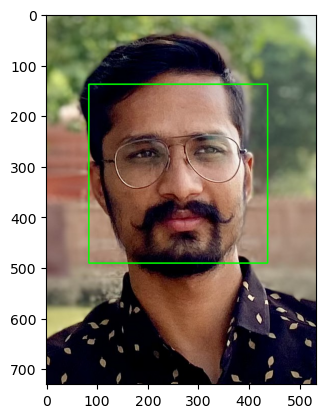

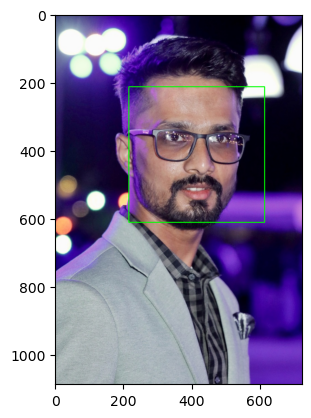

In [30]:
i = 7
j = 4
result = DeepFace.verify(images[i],test_image, detector_backend = backends[0],model_name=models[2],enforce_detection=False,align=True,normalization='Facenet2018',distance_metric='euclidean')
print(result)

draw_bbox(images[i],
            result['facial_areas']['img1']['x'],
            result['facial_areas']['img1']['y'],
            result['facial_areas']['img1']['w'],
            result['facial_areas']['img1']['h'])
draw_bbox(test_image,
            result['facial_areas']['img2']['x'],
            result['facial_areas']['img2']['y'],
            result['facial_areas']['img2']['w'],
            result['facial_areas']['img2']['h'])

In [31]:
def connect_to_database():
    try:
        # Connect to the PostgreSQL database
        conn = psycopg2.connect(
            host="localhost",
            database="User_Detail",
            user="postgres",
            password="Honey@1998"
        )

        # Create a cursor object to interact with the database
        cur = conn.cursor()
        return conn, cur, True
        
    except Exception as e:
        print("Error in connecting with database", e)
        return None, None, False


In [32]:
def close_connection(conn, cur):
    # Close the cursor and connection to the database
    cur.close()
    conn.close()
    database_check = False
    return database_check

In [33]:
embeddings = []
def create_embeddings_array():
    for image in images:
        embedding = DeepFace.represent(image, model_name=models[2], detector_backend=backends[0], enforce_detection=False,align=True,normalization='Facenet2018')
        embeddings.append(embedding[0]['embedding'])
create_embeddings_array()

In [34]:
def create_embeddings(img):
    embedding = DeepFace.represent(img, model_name=models[2], detector_backend=backends[0], enforce_detection=False,align=True,normalization='Facenet2018')
    return embedding[0]['embedding']

In [35]:
def delete_records(cur, conn,open_connection = False):
    delete_query = "DELETE FROM user_info"
    try:
        cur.execute(delete_query)
        conn.commit()
        if open_connection == False:
            close_connection(conn, cur)
        return True
    except Exception as e:
        print("Error in deleting records ", e)
        conn.rollback()
        return False


In [36]:
# target_path = '/Users/lakshyadujari/Desktop/Projects/NIC_AI/Facial Features/Facial-Features-Detection/img12.jpeg'
# target_img = cv2.imread(target_path)
# target = DeepFace.represent(target_img, model_name=models[0], detector_backend=backends[2], enforce_detection=False)
target_path = test_image_path
target_img = test_image
target = create_embeddings(target_img)

In [37]:
embeddings[7]

[1.3794865608215332,
 -0.22843919694423676,
 -0.20220044255256653,
 0.031482115387916565,
 -0.9786850214004517,
 -0.28160417079925537,
 1.7888329029083252,
 0.1513175517320633,
 0.19164016842842102,
 -0.3878690302371979,
 -0.21863584220409393,
 -0.04208796098828316,
 0.8104474544525146,
 0.5981721878051758,
 -0.3384759724140167,
 -0.4900008738040924,
 -0.9422981142997742,
 0.14501552283763885,
 1.282325267791748,
 1.0632613897323608,
 -0.1824057698249817,
 -0.6182804107666016,
 1.285529613494873,
 -0.9176239967346191,
 0.8212620615959167,
 0.5967118740081787,
 -0.05504964292049408,
 -1.0843902826309204,
 1.2402446269989014,
 -1.3080412149429321,
 1.3149620294570923,
 0.786952555179596,
 -1.1286793947219849,
 0.1079021692276001,
 -0.21545372903347015,
 -1.2888973951339722,
 -1.2416795492172241,
 1.1795839071273804,
 -0.36960384249687195,
 0.06853257119655609,
 -0.0034222789108753204,
 -0.8034133315086365,
 -1.2778980731964111,
 1.2800652980804443,
 -0.15800665318965912,
 -0.990619242191

In [75]:
conn,cur, database_check = connect_to_database()

In [76]:
threshold = 50
 
query = f"""
    select user_id,image, min(distance) as distance
    from (
        select user_id,image, sqrt(sum(distance)) as distance
        from (
            select user_id,image, pow(unnest(embedding) - unnest(ARRAY{target}), 2) as distance
            from embeddings
        ) sq
        group by user_id, image
    ) sq2
    group by user_id, image
    order by distance 
    LIMIT 1
"""

# threshold = 14
 
# query = f"""
#     select user_id,image, distance
#     from (
#         select user_id,image, sqrt(sum(distance)) as distance
#         from (
#             select user_id,image, pow(unnest(embedding) - unnest(ARRAY{target}), 2) as distance
#             from embeddings
#         ) sq
#         group by user_id, image
#     ) sq2
#     where distance < {threshold}
#     order by distance
# """

17.6816602736752651295


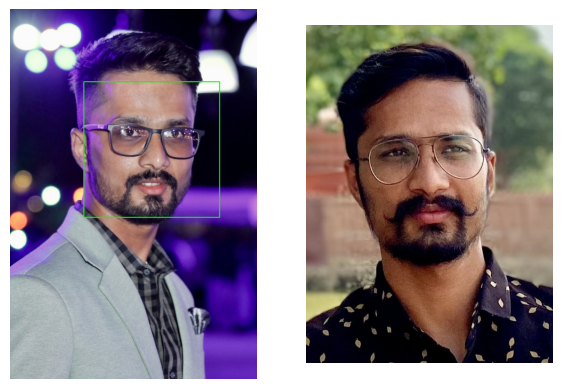

----------------
21.0288216859325101891


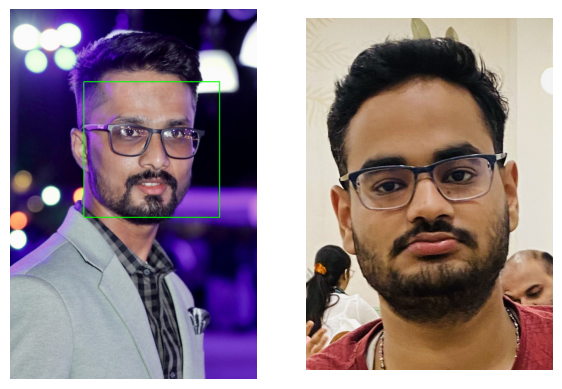

----------------
26.5372837989266704224


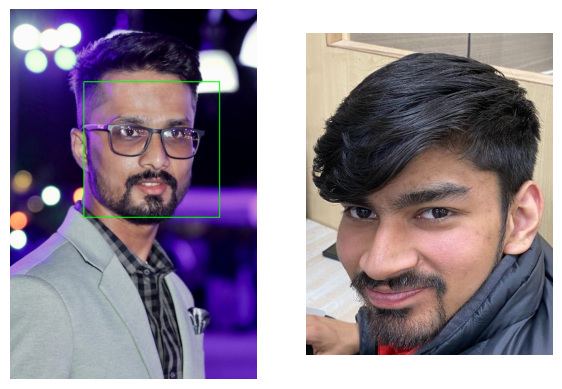

----------------
26.9902532194429787723


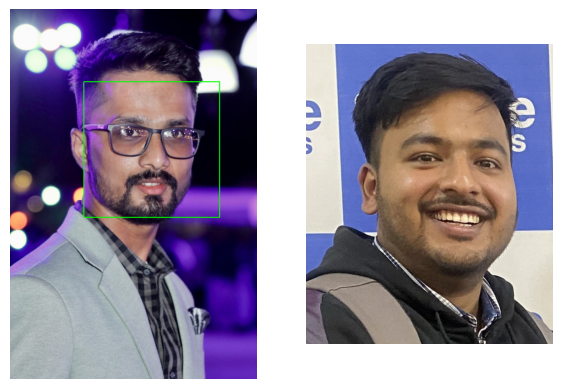

----------------
27.7909634078923288825


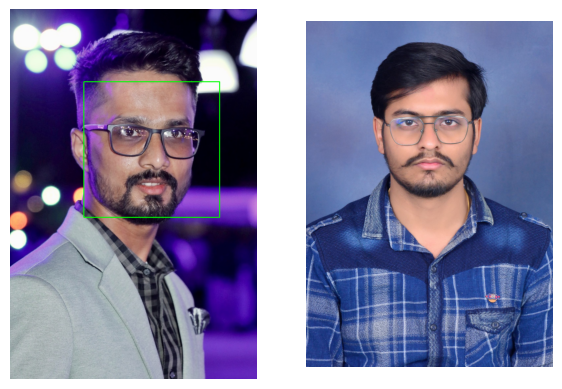

----------------
28.42058529900788994889


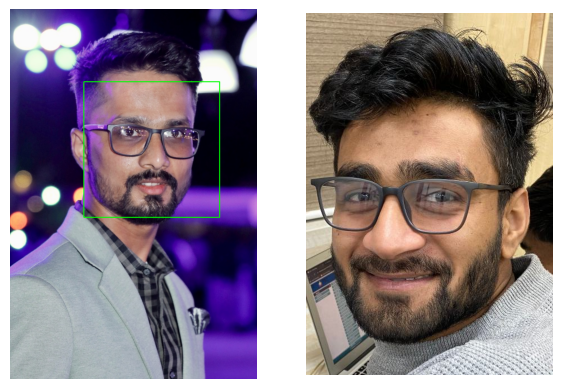

----------------
28.4242245167405646740


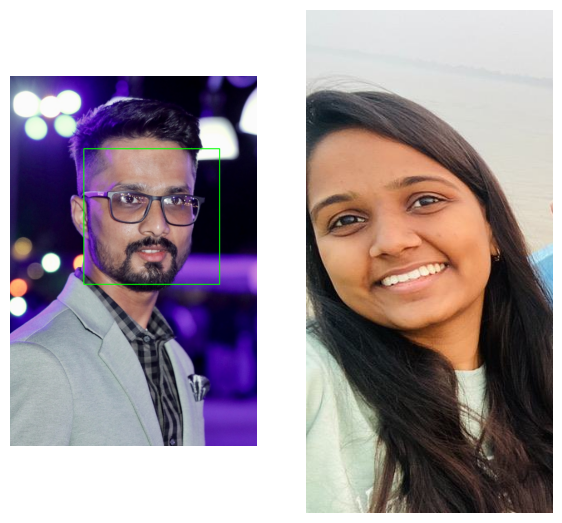

----------------
28.5456415763093151450


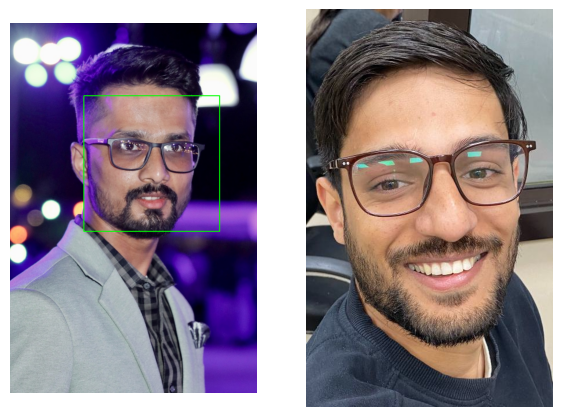

----------------
28.7526124560788515613


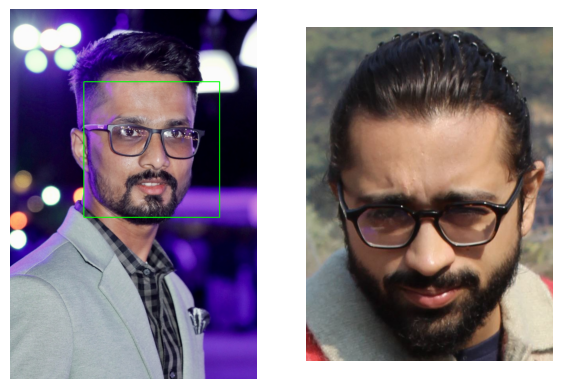

----------------
29.1176024701587590556


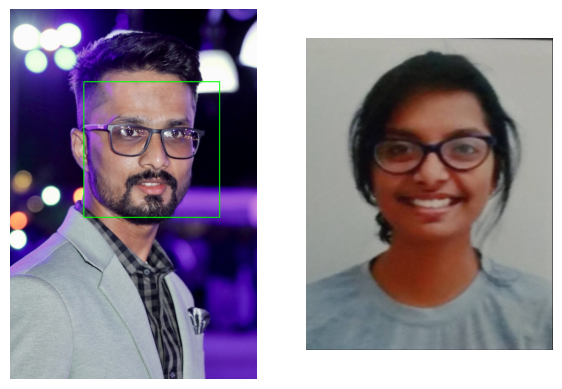

----------------
30.0917872765958205635


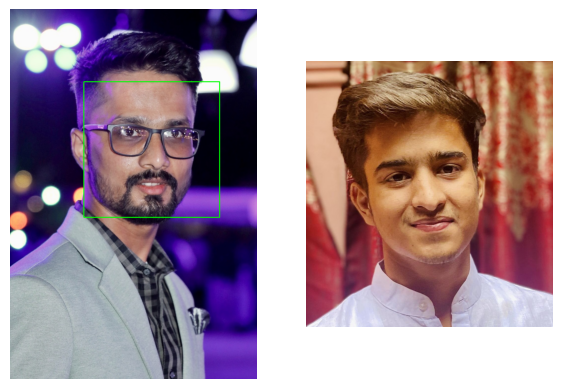

----------------
30.4035849006092712707


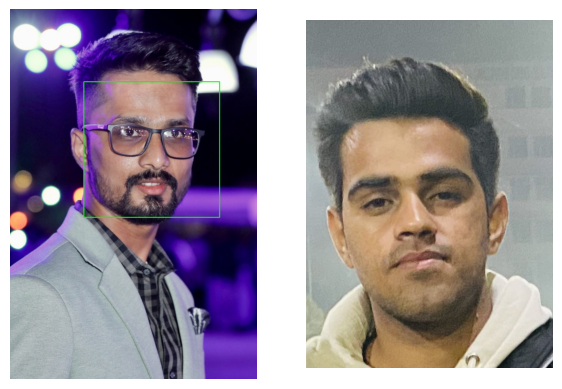

----------------
30.9007466060440805225


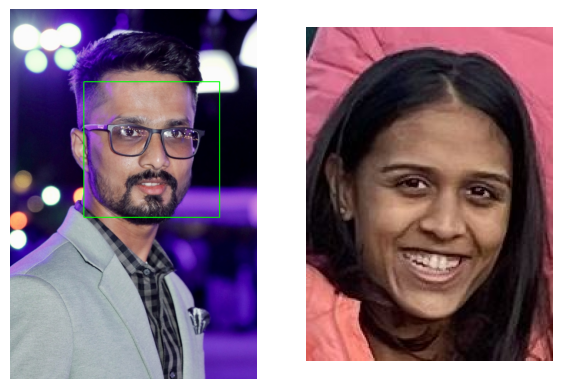

----------------


In [77]:
cur.execute(query)
rows = cur.fetchall()
for user_id,image,distance in rows:
    print(distance)
    img = cv2.imread(image)
    fig = plt.figure(figsize = (7, 7))
    
    fig.add_subplot(1, 2, 1)
    plt.imshow(target_img[:,:,::-1])
    plt.axis("off")
     
    fig.add_subplot(1, 2, 2)
    plt.imshow(img[:,:,::-1])
    plt.axis("off")
     
    plt.show()
    print("----------------")    

    

In [73]:
len(rows)

1

In [74]:
close_connection(conn, cur)

False

In [48]:
conn,cur,database_check = connect_to_database()
insert_embedding_query = """
    INSERT INTO embeddings ("image", "user_id", "embedding")
    VALUES (%s, %s, %s)
"""
image = pickle.dumps(images[0])
user_id = 1
embedding = embeddings[0]
cur.execute(insert_embedding_query, (image, user_id, embedding))


In [78]:
conn.commit()

In [79]:
close_connection(conn=conn, cur=cur)   

False

TypeError: Image data of dtype |S256701 cannot be converted to float

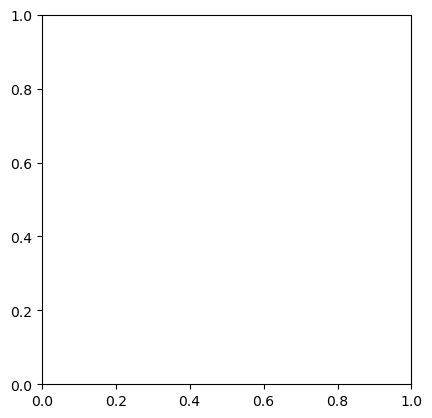

In [102]:
conn, cur, database_check = connect_to_database()
id = (1,)  # Pass the id as a tuple
select_usr_query = """
Select user_info.id,
    user_info.name,
    user_info.address,
    user_info.phone,
    user_info.email,
    embeddings.image,
    embeddings.user_id 
from user_info 
inner join embeddings on user_info.id = embeddings.user_id 
where user_info.id = %s
"""
cur.execute(select_usr_query, id)
result = cur.fetchone()
close_connection(conn,cur)
if result is not None:
    print(result[5])
    image = pickle.loads(result[5])
    image_base64 = base64.b64encode(image).decode('utf-8')
    plt.imshow(image)
else:
    print('no record found')
close_connection(conn,cur)